# Kings County Housing Prices Bakeoff


## Business Problem:

1. What are the most important variables in predicting the selling price of a house?

2. What variables can we create to make a strong model?

3. What type or types of statistical relationship can we use to create a strong model?

In [21]:
# Calculate the distance between two points on Earth using their latitude and longitude.
!pip install haversine

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import warnings

from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D
from haversine import haversine
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

# shows all the dataframe's columns
pd.set_option('display.max_columns', 999)

# converts exponencial numbers to float numbers
# pd.options.display.float_format = '{:,.0f}'.format 
# Note: I let the float_format code here in case it's needed to see non-exponential numbers if necessary

## 1. Read in Data

The first step is read the data from a csv file to a Pandas DataFrame.

In [22]:
test = pd.read_csv('./data/kc_house_data_test_features.csv', index_col=0)
train = pd.read_csv('./data/kc_house_data_train.csv', index_col=0)

## 2. Exploratory Data Analysis 
### 2.1 Understanding the dataframes

On this step, we will take a look at the dataframe and get familiar to the data.

In [23]:
# Check the shape of the dataframe
print(train.shape)
# Check the first 5 rows of the train dataframe
train.head()

(17290, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [24]:
# Check the shape of the dataframe
print(test.shape)
# Check the first 5 rows of the test dataframe
test.head()

(4323, 20)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [25]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
# Get information about the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


In [27]:
# Using describe to get basics statistical information
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [28]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
train.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

### Findings:
- The train data set contains 17290 rowns and 22 columns
- The test data set contains 4323 rows and  21 columns. It doesn't contain the columns price as expected
- The columns Unnamed: 0 is useless. It's just a repetition of the indexes.
- One of the houses contains 33 bedroom. It might be an outlier or incorrect data
- There aren't any null values.

### Create preliminary data visualizations

Here we will create some preliminary data visualizations to have a better idea of how the data set looks like.

Data visualizations:
- Histogram
- Correlation heatmap
- Scatterplot matrix
- Regression line plot

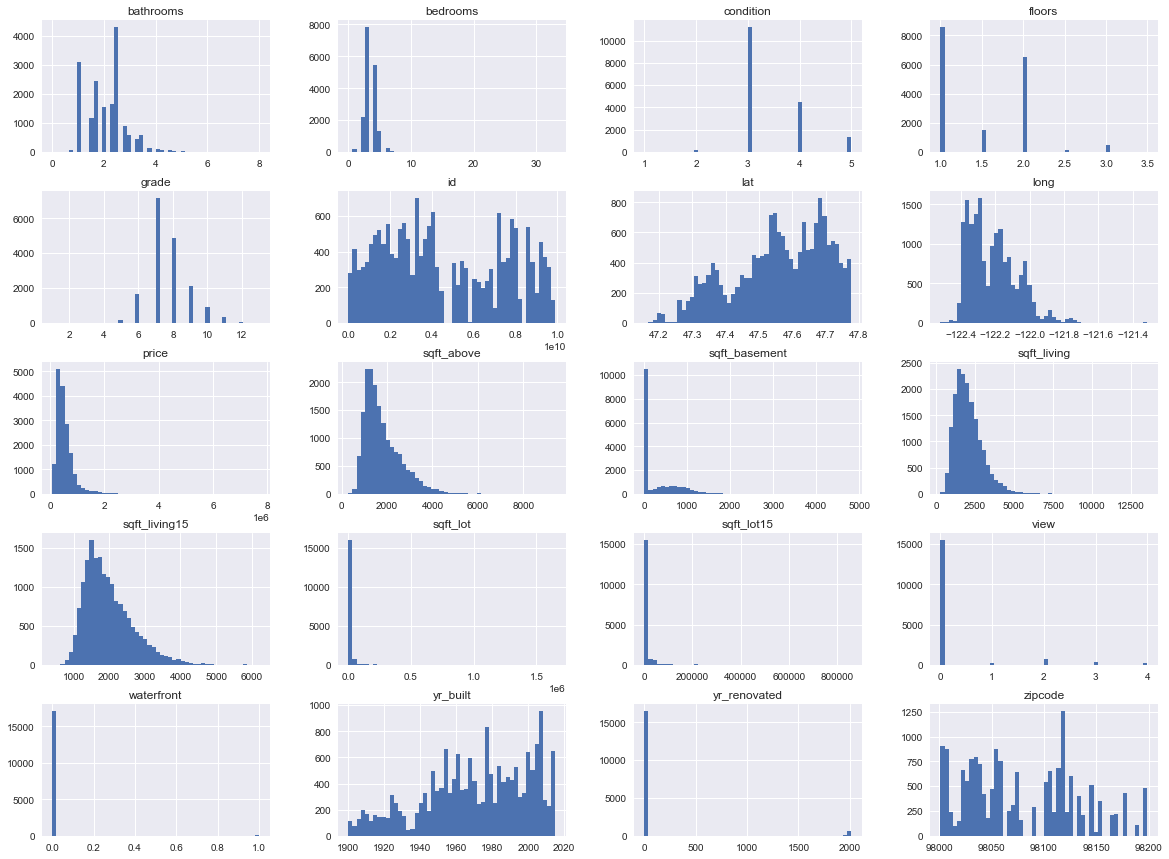

In [30]:
# Create a histogram of the data set to analyse the shape of the data
plt.style.use('seaborn')

train.hist(bins=50, figsize=(20,15))
plt.show()

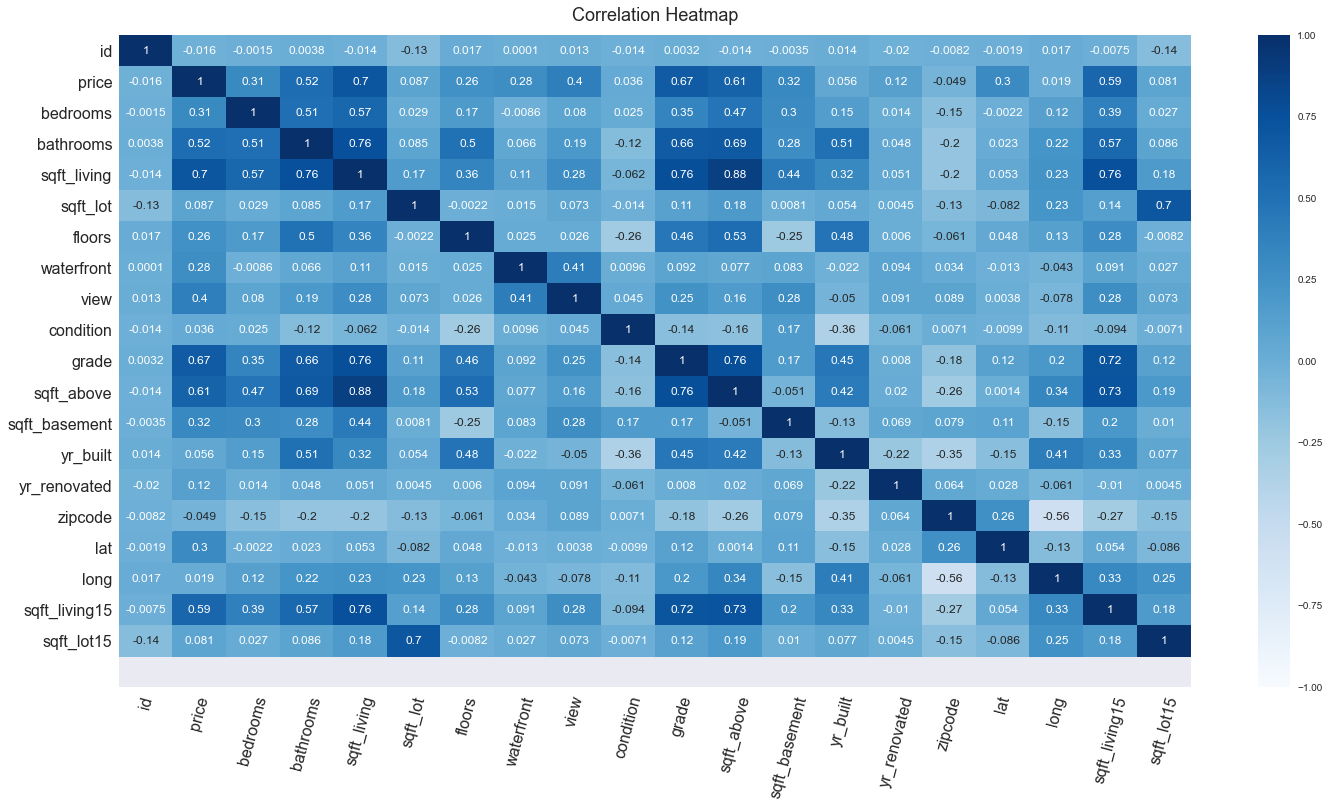

In [31]:
# Increase the size of the heatmap
plt.figure(figsize=(24, 12))
# Help to save the heatmap in high quality
plt.savefig('destination_path.eps', format='eps')
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues',annot_kws={"size": 12})
# This fixes a randering problem on the top and bottom of the heatmap
plt.ylim([21,0])
plt.style.use('seaborn')
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=14);

<strong>IMPORTANT:</strong> The matrix below takes several seconds/minutes to run. For this reason it will be kept commented to make sure that the kernel can restarted and ran faster. In case you want to see it, uncomment the code bellow.

In [32]:
# Uncomment the code bellow to see the scatterplot matrix. It will take several seconds to load

# sns.pairplot(train)

In [33]:
# Checking features with the highest to the lowest correlation with price

train.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703540
grade            0.666215
sqft_above       0.607760
sqft_living15    0.585567
bathrooms        0.524335
view             0.395485
sqft_basement    0.323312
bedrooms         0.305106
lat              0.302394
waterfront       0.275779
floors           0.256985
yr_renovated     0.117770
sqft_lot         0.086803
sqft_lot15       0.081423
yr_built         0.056450
condition        0.036099
long             0.019327
id              -0.015644
zipcode         -0.048958
Name: price, dtype: float64

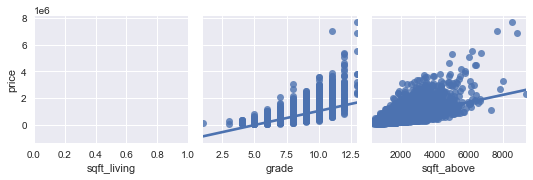

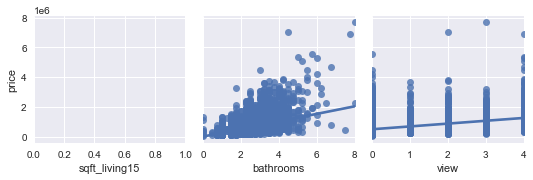

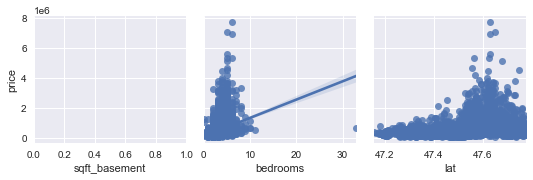

In [34]:
# Scatterplot matrix of the biggest correlations with price with different variables

sns.pairplot(train, x_vars=["sqft_living", "grade", "sqft_above"],y_vars="price",kind = 'reg');
sns.pairplot(train, x_vars=["sqft_living15","bathrooms","view"],y_vars="price",kind = 'reg');
sns.pairplot(train, x_vars=["sqft_basement","bedrooms","lat"],y_vars="price",kind = 'reg');

In [35]:
# Checking correlations greater than .7

df_2 = train[["sqft_living", "grade", "sqft_above","sqft_living15","bathrooms","view",
              "sqft_basement","bedrooms","lat"]]
abs(df_2.corr()) >.7

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat
sqft_living,True,True,True,True,True,False,False,False,False
grade,True,True,True,True,False,False,False,False,False
sqft_above,True,True,True,True,False,False,False,False,False
sqft_living15,True,True,True,True,False,False,False,False,False
bathrooms,True,False,False,False,True,False,False,False,False
view,False,False,False,False,False,True,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False
bedrooms,False,False,False,False,False,False,False,True,False
lat,False,False,False,False,False,False,False,False,True


We will run a preliminary OLS Regression Result to understand if the sqft_living feature can predict price. It's a very early stage but it will help me to better understand the data set

In [36]:
# Creating x and y axis
x_sqft_living = train['sqft_living']
y = train['price']

# Running OLS Regression Results
model_main = ols(formula = "y~x_sqft_living", data=train).fit()
model_main.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.694e+04
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:53:38   Log-Likelihood:            -2.4046e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.347e+04   4991.006    -10.714      0.000   -6.33e+04   -4.37e+04
x_sqft_living   285.4779      2.193    130.167      0.000     281.179     289.777
==============================================================================
Omnibus:                    12367.474   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507839.480
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      28.878   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
print(model_main.params)

Intercept       -53472.566426
x_sqft_living      285.477886
dtype: float64


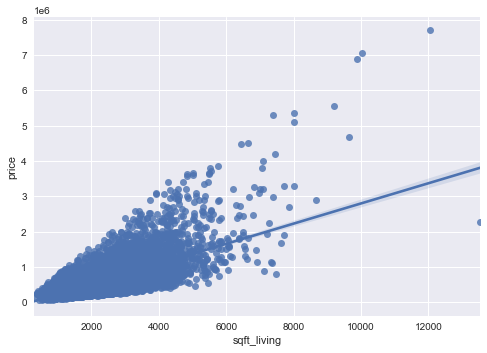

In [38]:
sns.regplot(x=x_sqft_living,y=y,data=train);

Let's also make sure that we are only seeing data of the Seattle region. To do so, let's create a heatmap using the latitude and longetude.

In [39]:
# Find the row of the house which has the highest price
maxpr=train.loc[train['price'].idxmax()]

# Define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = train.copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# Add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# Add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# Add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

### Findings:
- The histogram with all of the features showed us the distribution of the data set. Some of the them might need a log transformation
- Run a scatterplot matrix takes several seconds
- A correlation heatmap show us that the features "sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms", "lat" have the highest correlation with price
- A OLS table showed us that we can use the highest correlation for prediction
- A regression line plot between sqft_living and price also confirms this initial hypothesis
- It is clear that there is an outlier in the bedroom column
- All the data is from the region of Seattle

## 3. Cleaning the data

### 3.1 Fix any extremes problems with the data

In [40]:
# Using describe to get basics statistical information
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


It seems that there is a house with 33 bedrooms. Let's see if this is an outlier or it is common in our dataframe.

Also, it seems that there are houses without bathrooms.

In [41]:
# Let's drop a few columns that have very low or none correlation with the price

# COMMENT THIS FOR NOW

# train.drop(columns=['sqft_lot15','sqft_lot'],inplace=True)

In [42]:
# Using nlargest to see the rows with the highest number of bedrooms
train.nlargest(5,'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8597,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
2356,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
3680,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
11181,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
17114,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


Ok, it is an outlier. Based on the price, it sounds a weird that this house contains 33 bedrooms. Luckily, there is an ID that we can use on internet and see if we can find this house.

I was able to find the house with 33 bedrooms on <a href='https://www.zillow.com/homedetails/8023-Corliss-Ave-N-Seattle-WA-98103/48795792_zpid/'>Zillow</a> and <a href='https://clustrmaps.com/a/1lcrrs/'>Clustmaps</a>. All the information about the house matches, except the number of bedrooms, which seems a typo. The house has 3 bedrooms. Thus, I'll fix it.

In [43]:
# This fixes the house with 33 bedrooms turning it into a 3-bedroom house
train[train['bedrooms'] == 33] = train[train['bedrooms'] == 3]
# This will add 1 bathroom to houses without any bathroom
train['bathrooms'] = train.bedrooms.apply(lambda x: 1 if x < 1 else x)
# Checking if the bedroom outlier was fixed
train.nlargest(5,'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2356,1.773101e+09,20140821T000000,520000.0,11.0,11.0,3000.0,4960.0,2.0,0.0,0.0,3.0,7.0,2400.0,600.0,1918.0,1999.0,98106.0,47.5560,-122.363,1420.0,4960.0
3680,8.812401e+09,20141229T000000,660000.0,10.0,10.0,2920.0,3745.0,2.0,0.0,0.0,4.0,7.0,1860.0,1060.0,1913.0,0.0,98105.0,47.6635,-122.320,1810.0,3745.0
11181,6.273001e+08,20140814T000000,1148000.0,10.0,10.0,4590.0,10920.0,1.0,0.0,2.0,3.0,9.0,2500.0,2090.0,2008.0,0.0,98004.0,47.5861,-122.113,2730.0,10400.0
17114,5.566100e+09,20141029T000000,650000.0,10.0,10.0,3610.0,11914.0,2.0,0.0,0.0,4.0,7.0,3010.0,600.0,1958.0,0.0,98006.0,47.5705,-122.175,2040.0,11914.0
3425,4.240490e+08,20140811T000000,450000.0,9.0,9.0,4050.0,6504.0,2.0,0.0,0.0,3.0,7.0,4050.0,0.0,1996.0,0.0,98144.0,47.5923,-122.301,1448.0,3866.0


### Findings:

- The outlier in the bedroom collumn was a typo and it was fixed.
- One bathroom was included to all the houses without bathroom in the data set.
- One bedroom was included to all the houses without a bedroom in the data set.

## 4. Generate and investigate new features

### 4.1 Create dummy columns for zip codes

In [44]:
# Creting a temporary copy in case something goes wrong
df = train.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2.591820e+09,20141006T000000,365000.0,4.0,4.0,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0
1,7.974201e+09,20140821T000000,865000.0,5.0,5.0,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0
2,7.701450e+09,20140815T000000,1038000.0,4.0,4.0,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,9685.0
3,9.522300e+09,20150331T000000,1490000.0,3.0,3.0,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,14226.0
4,9.510861e+09,20140714T000000,711000.0,3.0,3.0,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,4050.0


In [45]:
# Create dummy columns for the zip codes
df_zip_dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df_zips = pd.concat([df, df_zip_dummies], axis=1)
df_zips.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98103.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
0,2.591820e+09,20141006T000000,365000.0,4.0,4.0,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.974201e+09,20140821T000000,865000.0,5.0,5.0,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.701450e+09,20140815T000000,1038000.0,4.0,4.0,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,9685.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.522300e+09,20150331T000000,1490000.0,3.0,3.0,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,14226.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.510861e+09,20140714T000000,711000.0,3.0,3.0,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,4050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.2 Fix the date column for more usefull information

In [46]:
# This code fixes the date column and creates a year_sold and month_sold column
df_zips['date_sold'] = pd.to_datetime(train['date'])
df_zips['year_sold'] = df_zips.date_sold.dt.year
df_zips['month_sold'] = df_zips.date_sold.dt.month
df_zips.drop(columns=['date'],inplace=True)
df_zips.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98103.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0,date_sold,year_sold,month_sold
0,2.591820e+09,365000.0,4.0,4.0,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-10-06,2014.0,10.0
1,7.974201e+09,865000.0,5.0,5.0,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-08-21,2014.0,8.0
2,7.701450e+09,1038000.0,4.0,4.0,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,9685.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-08-15,2014.0,8.0
3,9.522300e+09,1490000.0,3.0,3.0,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,14226.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-31,2015.0,3.0
4,9.510861e+09,711000.0,3.0,3.0,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,4050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-14,2014.0,7.0


### 4.3 Analyze price during different months of the year

Just for the records, let's see if we can see any patterns related to the month when the houses were sold.

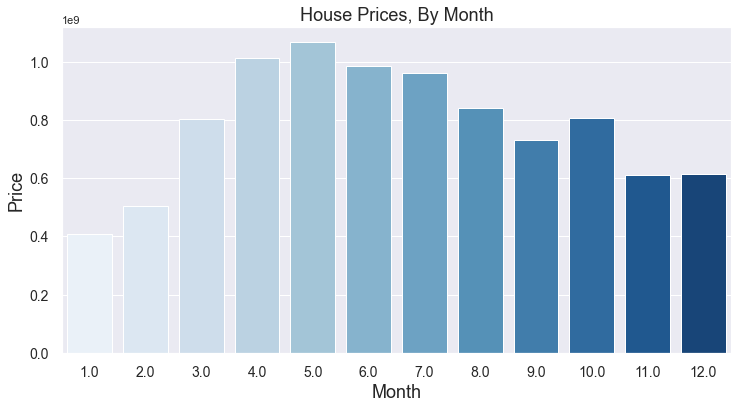

In [48]:
# Plotting the month vs. price of when the houses were sold
month_price = df_zips.groupby(['month_sold'])['price'].sum().reset_index().sort_values('month_sold', ascending=True)

sns.set(rc={'figure.figsize':(12,6)})
plot = sns.barplot('month_sold','price' , data = month_price, order= month_price['month_sold'], palette='Blues');
plot.set_title('House Prices, By Month',fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(labels=['January', February, ],fontsize=14)
plt.yticks(fontsize=14)
plt.show()

It seems that houses sold between March and November had the highest prices. It seems that houses in Seattle can be more expensive in the hotter months

In [49]:
# Checking the new shape for the dataframe
print(df_zips.shape)
# Checking the columns
df_zips.columns

(17290, 92)


Index([           'id',         'price',      'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',       'zipcode',
                 'lat',          'long', 'sqft_living15',    'sqft_lot15',
               98002.0,         98003.0,         98004.0,         98005.0,
               98006.0,         98007.0,         98008.0,         98010.0,
               98011.0,         98014.0,         98019.0,         98022.0,
               98023.0,         98024.0,         98027.0,         98028.0,
               98029.0,         98030.0,         98031.0,         98032.0,
               98033.0,         98034.0,         98038.0,         98039.0,
               98040.0,         98042.0,         98045.0,         98052.0,
               98053.0,         98055.0,         98056.0,         98058.0,
               98059.0,  

Let's see if we can get any insights from zipcode and price

In [ ]:
# Creating a plot between the price and zipcode
sns.regplot('zipcode','price',data=df_zips)

In [ ]:
all_mod = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+sqft_above+sqft_basement', data=df_zips).fit()
all_mod.summary()

### Coefficient interpretation:

Using an OLS table, we are able to analyze a few points of the data that will help us later to built a strong model. The R-squared for this model is 0.54. It might not be a very strong model.

- Bedrooms: It seems that there a problem with this model. This table says the the price of the house reduces with more bedroom. We will look into this later on.
- Bathrooms: Each bathrooms in a house affects in this model seems to increase the value of the house in 4847 dollars. However, the P-value is not small enough to tell us that this model is not a good fit as well to analyze bathrooms.
- Square Feet Living Space: For each square feet, the price of the house increases 209 dollars, based on this model.
- Square Feet Lot: The size of lot doesn't seem to affect the value of a house.
- Floors: The P-value for floors is also higher than 0.05. Which means that we don't have enough information to say that it affect the price of a house in this model
- Waterfront: A house being waterfront seems increase the price of a house as well. However, the number is exponencial, so I can't say for sure the value.
- Square Feet Above: Each square feet above increases the price of a house in 94 dollars in this modal
- Square Feet Basement: each square feet of basement increases the price of a house in 114 dollars in this modal

## 5. Create features and targets for the models

In [28]:
# Deleting null values. It shouldn't change the shape of the dataframe
print(df_zips.shape)
print(df_zips.shape)
# print(df_features.shape)
# print(df_features.shape)
df_zips.dropna(inplace=True)
df_zips.dropna(inplace=True)
# X_test_2.dropna(inplace=True)
# y_test_2.dropna(inplace=True)
print(df_zips.shape)
print(df_zips.shape)
# print(X_test_2.shape)
# print(y_test_2.shape)

(17290, 92)
(17290, 92)
(17289, 92)
(17289, 92)


In [29]:
# Creating a list of all the columns to use as features
features=['bedrooms',
           'bathrooms',   'sqft_living',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',       'zipcode',
                 'lat',          'long', 'sqft_living15',         98002.0,
               98003.0,         98004.0,         98005.0,         98006.0,
               98007.0,         98008.0,         98010.0,         98011.0,
               98014.0,         98019.0,         98022.0,         98023.0,
               98024.0,         98027.0,         98028.0,         98029.0,
               98030.0,         98031.0,         98032.0,         98033.0,
               98034.0,         98038.0,         98039.0,         98040.0,
               98042.0,         98045.0,         98052.0,         98053.0,
               98055.0,         98056.0,         98058.0,         98059.0,
               98065.0,         98070.0,         98072.0,         98074.0,
               98075.0,         98077.0,         98092.0,         98102.0,
               98105.0,         98106.0,         98107.0,         98108.0,
               98109.0,         98112.0,         98115.0,         98116.0,
               98117.0,         98118.0,         98119.0,         98122.0,
               98125.0,         98126.0,         98133.0,         98136.0,
               98144.0,         98146.0,         98148.0,         98155.0,
               98166.0,         98168.0,         98177.0,         98178.0,
               98188.0,         98198.0,         98199.0,     'date_sold',
           'year_sold',    'month_sold']

# Creating a dataframe with the features
df_features = df_zips[features]
# Creating a target
target = df_zips['price']
# Use describe to analyze the dataframe
df_features.describe()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0,year_sold,month_sold
count,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.00000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000
mean,3.370756,3.371450,2081.491295,1.490341,0.007982,0.238533,3.408410,7.654462,1789.349355,292.141940,1970.793395,83.811152,98078.191740,47.560051,-122.214252,1988.024756,0.009081,0.012956,0.013708,0.008098,0.022268,0.007057,0.013072,0.004280,0.009428,0.005842,0.008387,0.010932,0.023715,0.003760,0.019203,0.012667,0.014460,0.011626,0.012436,0.005958,0.020533,0.025161,0.026317,0.002429,0.013245,0.024466,0.010180,0.027416,0.01874,0.012146,0.019434,0.022268,0.021574,0.014402,0.005726,0.012436,0.020707,0.016542,0.009370,0.016542,0.004627,0.009833,0.015386,0.012262,0.008734,0.004916,0.012493,0.026896,0.015386,0.025276,0.023715,0.008618,0.013592,0.018567,0.016080,0.023136,0.012378,0.015559,0.014229,0.002487,0.020244,0.012089,0.012436,0.012609,0.012436,0.006305,0.012725,0.015386,2014.323153,6.570594
std,0.911945,0.909757,920.038453,0.538912,0.088987,0.775249,0.651202,1.174742,829.269508,443.159284,29.343807,400.340447,53.609167,0.138413,0.140859,684.804154,0.094863,0.113089,0.116280,0.089624,0.147560,0.083709,0.113586,0.065285,0.096642,0.076211,0.091197,0.103985,0.152163,0.061202,0.137242,0.111836,0.119381,0.107198,0.110823,0.076957,0.141820,0.156617,0.160082,0.049229,0.114327,0.154497,0.100383,0.163298,0.13561,0.109543,0.138050,0.147560,0.145293,0.119145,0.075457,0.110823,0.142405,0.127552,0.096348,0.127552,0.067868,0.098675,0.123084,0.110057,0.093049,0.069947,0.111077,0.161783,0.123084,0.156967,0.152163,0.092436,0.115795,0.134993,0.125785,0.150340,0.110568,0.123765,0.118436,0.049811,0.140838,0.109285,0.110823,0.111584,0.110823,0.079153,0.112088,0.123084,0.467694,3.117086
min,0.000000,1.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

## 6. Train-Test Split

### 6.1 Perform a train-test split of the data.

I will not use the columns data_sold, year_sold and month_sold to create predictions. Thus, I'll drop them.

I will also drop any null values. The shape of the dataframe should not change.

In [30]:
# Drop data_sold, year_sold and month_sold columns
df_features.drop(columns=['date_sold','year_sold','month_sold'],inplace=True)
# Checking the columns and the shape of the current dataframe
print(df_features.columns)
print(df_features.shape)
# Dropping null values
df_features.dropna()
# Checking if the dataframe changed
print(df_features.shape)

Index([     'bedrooms',     'bathrooms',   'sqft_living',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
             'zipcode',           'lat',          'long', 'sqft_living15',
               98002.0,         98003.0,         98004.0,         98005.0,
               98006.0,         98007.0,         98008.0,         98010.0,
               98011.0,         98014.0,         98019.0,         98022.0,
               98023.0,         98024.0,         98027.0,         98028.0,
               98029.0,         98030.0,         98031.0,         98032.0,
               98033.0,         98034.0,         98038.0,         98039.0,
               98040.0,         98042.0,         98045.0,         98052.0,
               98053.0,         98055.0,         98056.0,         98058.0,
               98059.0,         98065.0,         98070.0,         98072.0,
               98074.0,  

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=3,test_size=0.2)


# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13831, 84) Target:  (13831,)
Test set - Features:  (3458, 84) Target:  (3458,)


## 7. Drop features columns with correlation greater than 0.9

For the second model, we will eliminate the multicollinearity and see if we can improve our model.

In [32]:
# Creating train test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [33]:
# Create correlation matrix
corr_matrix = X_train_2.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper_triangle

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
bedrooms,NaN,0.999518,0.591149,0.182488,0.008636,0.082120,0.019685,0.365057,0.490551,0.302368,0.157802,0.014911,0.142640,0.008531,0.123247,0.399536,0.003564,0.005947,0.056092,0.043659,0.070720,0.031240,0.050405,0.000519,0.023493,0.037750,0.004280,0.027877,0.008142,0.001666,0.027143,0.013733,0.004158,0.010699,0.014346,0.007605,0.035427,0.018765,0.011260,0.029644,0.082949,0.003762,0.016706,0.044018,0.021419,0.019030,0.004378,0.024407,0.056760,0.018210,0.050990,0.001786,0.038866,0.070428,0.023841,0.012894,0.002979,0.008365,0.038354,0.048157,0.021945,0.002689,0.022028,0.025620,0.035817,0.065035,0.052395,0.003575,0.024664,0.022733,0.070461,0.045888,0.045782,0.013503,0.031165,0.008492,0.007699,0.003334,0.035198,0.001166,0.001159,0.008371,0.023119,0.019046
bathrooms,NaN,NaN,0.592398,0.183677,0.008740,0.082286,0.018816,0.365317,0.491787,0.302632,0.158812,0.014767,0.143183,0.008799,0.124144,0.400756,0.003659,0.006064,0.056147,0.043703,0.070783,0.031253,0.050445,0.000578,0.023474,0.037923,0.004374,0.028048,0.008026,0.000453,0.027096,0.013672,0.004061,0.010633,0.015012,0.007693,0.035400,0.018675,0.011660,0.029685,0.083078,0.004147,0.016840,0.043994,0.021009,0.019183,0.004268,0.024340,0.056786,0.019464,0.050129,0.001692,0.038849,0.070506,0.023825,0.012815,0.002929,0.008299,0.038572,0.048389,0.022086,0.002756,0.021991,0.025839,0.036026,0.065358,0.052146,0.003665,0.024839,0.022318,0.070770,0.045624,0.046009,0.013655,0.031355,0.008559,0.007844,0.003245,0.035394,0.001066,0.001062,0.008325,0.023283,0.019209
sqft_living,NaN,NaN,NaN,0.360412,0.106152,0.281028,0.060773,0.759829,0.875863,0.425140,0.318833,0.049375,0.184773,0.047672,0.233988,0.754343,0.047865,0.025656,0.103773,0.051967,0.128355,0.001713,0.009701,0.002308,0.013896,0.001083,0.009455,0.031025,0.011581,0.022984,0.061711,0.004039,0.030547,0.012464,0.019104,0.031639,0.046913,0.017299,0.012073,0.077777,0.120986,0.019660,0.004832,0.049015,0.083711,0.033673,0.010312,0.003794,0.053855,0.065446,0.014715,0.029585,0.085423,0.138429,0.082528,0.021343,0.018163,0.004473,0.080236,0.060436,0.036965,0.002744,0.055079,0.045381,0.029119,0.075400,0.073450,0.006508,0.037127,0.045984,0.066120,0.078289,0.040434,0.019477,0.056975,0.024526,0.047824,0.001873,0.068392,0.024903,0.036916,0.017899,0.037789,0.011077
floors,NaN,NaN,NaN,NaN,0.033862,0.032709,0.259014,0.460939,0.530406,0.249548,0.482624,0.007618,0.054884,0.046636,0.126692,0.283240,0.027492,0.034952,0.016059,0.039243,0.010220,0.014932,0.066558,0.002310,0.004716,0.008805,0.034513,0.035203,0.046499,0.006672,0.045781,0.014887,0.102961,0.003214,0.012564,0.038178,0.000651,0.055432,0.076732,0.004834,0.003183,0.001050,0.000149,0.021856,0.048241,0.022578,0.015905,0.028750,0.039713,0.086091,0.013385,0.010706,0.057998,0.083099,0.028601,0.029311,0.063499,0.012553,0.023361,0.062522,0.021951,0.029684,0.069309,0.021798,0.008692,0.011707,0.045631,0.049159,0.069953,0.034884,0.029949,0.024622,0.003197,0.038873,0.057142,0.025486,0.067536,0.045580,0.067532,0.051630,0.061772,0.038226,0.055107,0.011549
waterfront,NaN,NaN,NaN,NaN,NaN,0.416045,0.008135,0.090349,0.076620,0.075805,0.017982,0.092220,0.038277,0.012714,0.041217,0.090655,0.008772,0.010334,0.010568,0.008052,0.013878,0.007667,0.039186,0.005890,0.008667,0.007009,0.008455,0.009599,0.006651,0.005735,0.006791,0.002988,0.011132,0.009788,0.0

In [34]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_2.drop(columns=to_drop, inplace=False)
X_test_2.drop(columns=to_drop, inplace=False)

,bedrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
9193,1.0,430.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,1912.0,0.0,98014.0,47.6499,-121.909,1200.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12171,3.0,1610.0,1.0,0.0,0.0,4.0,7.0,1610.0,0.0,1967.0,0.0,98042.0,47.3398,-122.133,1610.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6693,3.0,1950.0,1.0,0.0,0.0,4.0,7.0,1950.0,0.0,1962.0,0.0,98011.0,47.7685,-122.200,1950.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7069,3.0,1540.0,1.0,0.0,0.0,3.0,7.0,1120.0,420.0,1961.0,0.0,98011.0,47.7605,-122.217,1910.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11022,3.0,2080.0,2.0,0.0,0.0,3.0,7.0,2080.0,0.0,2004.0,0.0,98065.0,47.5300,-121.848,2080.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,4.0,1900.0,1.0,0.0,0.0,4.0,7.0,1400.0,500.0,1959.0,0.0,98032.0,47.3582,-122.284,1700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11094,4.0,1870.0,1.0,0.0,0.0,3.0,7.0,1100.0,770.0,1977.0,0.0,98058.0,47.4521,-122.161,1590.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5004,4.0,2320.0,1.0,0.0,0.0,4.0,8.0,1160.0,1160.0,1966.0,0.0,98032.0,47.3627,-122.285,1970.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5924,3.0,1850.0,2.0,0.0,0.0,3.0,6.0,1740.0,110.0,1928.0,0.0,98108.0,47.5446,-122.296,1520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Checking which columns were dropped
to_drop

['bathrooms']

In [36]:
# Deleting null values. It shouldn't change the shape of the dataframe
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)
X_train_2.dropna(inplace=True)
y_train_2.dropna(inplace=True)
X_test_2.dropna(inplace=True)
y_test_2.dropna(inplace=True)
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(13831, 84)
(13831,)
(3458, 84)
(3458,)
(13831, 84)
(13831,)
(3458, 84)
(3458,)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 8. Select the best features based on some statistical measure 
## 8.1 Selecting the best 20 features

In [37]:
# Creating train test sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [42]:
# Checking shape of the dataframe
X_train_3.shape

(13831, 84)

In [43]:
# This fixes the "Input contains NaN, infinity or a value too large for dtyp" error
print(X_train_3.shape)
print(y_train_3.shape)
print(X_test_3.shape)
print(y_test_3.shape)
X_train_3.dropna(inplace=True)
y_train_3.dropna(inplace=True)
X_test_3.dropna(inplace=True)
y_test_3.dropna(inplace=True)
print(X_train_3.shape)
print(y_train_3.shape)
print(X_test_3.shape)
print(y_test_3.shape)

(13831, 84)
(13831,)
(3458, 84)
(3458,)
(13831, 84)
(13831,)
(3458, 84)
(3458,)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
# Using f_regression to to know the significance of each feature in improving the model
selector = SelectKBest(f_regression, k=40)

selector.fit(X_train, y_train)

SelectKBest(k=40, score_func=<function f_regression at 0x7fba9c59dd90>)

In [45]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [46]:
# Checking how many columns were deleted
len(list(removed_columns))

44

In [47]:
selected_columns

Index([     'bedrooms',     'bathrooms',   'sqft_living',        'floors',
          'waterfront',          'view',         'grade',    'sqft_above',
       'sqft_basement',  'yr_renovated',           'lat', 'sqft_living15',
               98002.0,         98003.0,         98004.0,         98006.0,
               98022.0,         98023.0,         98030.0,         98031.0,
               98033.0,         98038.0,         98039.0,         98040.0,
               98042.0,         98055.0,         98058.0,         98075.0,
               98092.0,         98102.0,         98105.0,         98106.0,
               98109.0,         98112.0,         98119.0,         98133.0,
               98168.0,         98178.0,         98198.0,         98199.0],
      dtype='object')

The RMSE for the first model is 164,075 for the training set and 169,166 for the testing set. It's a strong model but we should try getting the RMSE even lower.

## 9. Log Transformation

In [48]:
df_log = df_features.copy()

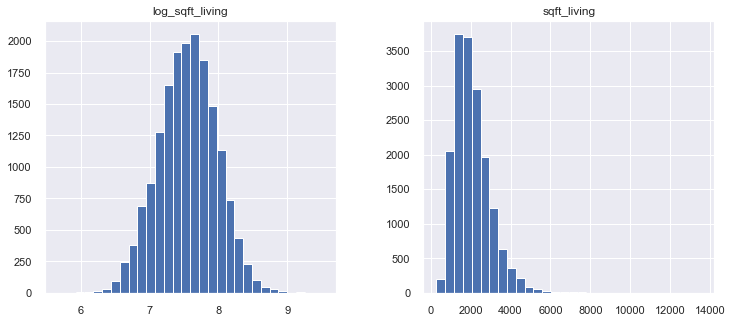

In [49]:
# Engineer the log transformation
df_log['log_sqft_living'] = np.log(df_log['sqft_living'])

#Plot histograms to compare the original vs. log transformed version of variable
df_log[['sqft_living', 'log_sqft_living']].hist(figsize=(12,5),bins=30);

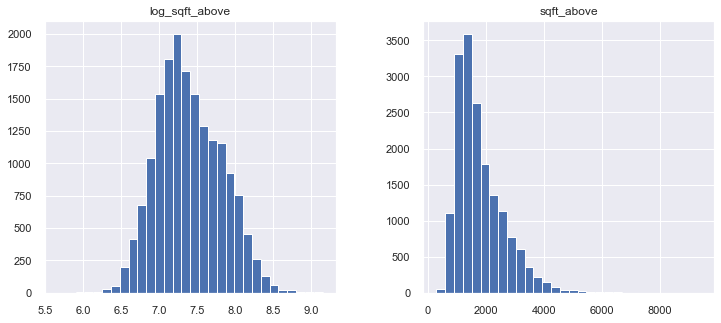

In [50]:
#Engineer the log transformation
df_log['log_sqft_above'] = np.log(df_log['sqft_above'])

#Plot histograms to compare the original vs. log transformed version of variable
df_log[['sqft_above', 'log_sqft_above']].hist(figsize=(12,5),bins=30);

In [51]:
df_3 = df_log.drop(columns=['sqft_above','sqft_living'])

In [52]:
df_3.head().T

,0,1,2,3,4
bedrooms,4.000000,5.000000,4.00000,3.000000,3.000000
bathrooms,4.000000,5.000000,4.00000,3.000000,3.000000
floors,2.000000,1.000000,2.00000,2.000000,2.000000
waterfront,0.000000,0.000000,0.00000,0.000000,0.000000
view,0.000000,0.000000,2.00000,2.000000,0.000000
...,...,...,...,...,...
98188.0,0.000000,0.000000,0.00000,0.000000,0.000000
98198.0,0.000000,0.000000,0.00000,0.000000,0.000000
98199.0,0.000000,0.000000,0.00000,0.000000,0.000000
log_sqft_living,7.635304,7.972466,8.23483,8.425078,7.843849


In [53]:
print(df_3.columns)
print(df_3.shape)
df_3.dropna()
print(df_3.shape)

Index([       'bedrooms',       'bathrooms',          'floors',
            'waterfront',            'view',       'condition',
                 'grade',   'sqft_basement',        'yr_built',
          'yr_renovated',         'zipcode',             'lat',
                  'long',   'sqft_living15',           98002.0,
                 98003.0,           98004.0,           98005.0,
                 98006.0,           98007.0,           98008.0,
                 98010.0,           98011.0,           98014.0,
                 98019.0,           98022.0,           98023.0,
                 98024.0,           98027.0,           98028.0,
                 98029.0,           98030.0,           98031.0,
                 98032.0,           98033.0,           98034.0,
                 98038.0,           98039.0,           98040.0,
                 98042.0,           98045.0,           98052.0,
                 98053.0,           98055.0,           98056.0,
                 98058.0,           9805

# Models

## TEST MODEL 1


The first model doens't filter any feature out of the dataset. Now we will fit the model to the training set.

In [54]:
# Instantiate a linear regression object
lm = LinearRegression()

# Fitting linear regression to the data
lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)
print ("\nR^2 Score:", lm.score(X_train, y_train))

-266679232.19846722
[-2.45800316e+04 -4.21313294e+03  2.53767144e+14 -3.85910425e+04
  6.79296609e+05  5.68515964e+04  2.95916981e+04  5.45533445e+04
 -2.53767144e+14 -2.53767144e+14 -6.11976562e+02  1.89375000e+01
  2.46954297e+03  2.41676485e+05 -1.13941301e+05  5.90625000e+00
  2.91605145e+04 -3.01502172e+04  7.19891765e+05  2.17424175e+05
  1.99950184e+05  1.79990852e+05  1.70507403e+05  7.13921260e+04
  4.81747768e+03  4.46056944e+04 -1.63162295e+04 -8.55970380e+03
 -9.66109514e+04  1.11026555e+05  8.65044563e+04 -4.04965607e+04
  1.12970522e+05 -6.72533919e+04 -7.10348141e+04 -7.79321266e+04
  1.92660340e+05  4.07910845e+04 -3.96760254e+04  1.24097197e+06
  3.60690130e+05 -8.38661736e+04  8.09852499e+03  3.54879501e+04
  3.88881494e+03 -1.13865537e+05 -8.40985833e+04 -1.22774057e+05
 -9.11717349e+04 -6.63668071e+04 -2.23208710e+05 -1.01492519e+05
 -5.77651204e+04 -5.06268233e+04 -1.54871462e+05 -2.43529869e+05
  2.09780919e+05  1.41733889e+05 -1.72302515e+05 -4.33731653e+03
 -1.9

It seems that the R Squared of this initial model is 0.806. Not bad. Let's check the RMSE

In [55]:
y_train_pred = lm.predict(X_train)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 97160.87835456572
Mean Squared Error: 26901136247.41686
Root Mean Squared Error: 164015.65854337462


In [56]:
# This fixes the "Input contains NaN, infinity or a value too large for dtyp" error
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13831, 84)
(13831,)
(3458, 84)
(3458,)
(13831, 84)
(13831,)
(3458, 84)
(3458,)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fitting the model to the testing set.

In [57]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7879459653000559


In [58]:
y_pred = lm.predict(X_test)

In [59]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:100183.82223334139
Mean Squared Error:29260881092.407135
Root Mean Squared Error:171058.12197147243


In [60]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  164015 vs. Testing:  171058


The RMSE for the first model is 164,078 for the training set and 169,137 for the testing set. It's a strong model but we should try getting the RMSE even lower.

## TEST MODEL 2

Now let's fit the model after deleting the high correlation between the feature columns

In [61]:
#instantiate a linear regression object
lm_2 = LinearRegression()

# Fitting linear regression to the data
lm_2.fit(X_train_2, y_train_2)


print(lm_2.intercept_)
print(lm_2.coef_)
print ("\nR^2 Score:", lm_2.score(X_train_2, y_train_2))

-289295067.3030873
[-2.89467616e+04  4.81740318e+03  6.62953880e+14 -3.68941328e+04
  6.35106569e+05  5.62365400e+04  2.80293068e+04  6.03139017e+04
 -6.62953880e+14 -6.62953880e+14 -5.50937500e+02  2.26875000e+01
  2.77793750e+03  1.51355387e+05 -8.54103164e+04  1.33750000e+01
  3.14138250e+04 -1.54905088e+04  7.31341079e+05  2.45414650e+05
  2.30527412e+05  1.95899840e+05  2.05153194e+05  6.58014457e+04
  4.19231955e+04  5.81728840e+04  6.89503589e+03 -2.12746704e+04
 -1.03711020e+05  1.00714916e+05  8.38938009e+04 -1.12157783e+04
  1.11596408e+05 -7.94430653e+04 -7.05207092e+04 -8.75663469e+04
  2.04939294e+05  6.00629785e+04 -5.55785566e+04  1.09660121e+06
  3.66734887e+05 -9.79063047e+04  1.67428931e+03  4.78535843e+04
  1.69111924e+04 -1.18515622e+05 -8.01445400e+04 -1.33015867e+05
 -9.14120693e+04 -8.92381064e+04 -2.05453019e+05 -1.02150690e+05
 -5.79665476e+04 -6.32044711e+04 -1.39356071e+05 -2.76859854e+05
  2.15209742e+05  1.31321586e+05 -1.82279590e+05  6.27911865e+02
 -1.98

In [62]:
y_train_pred_2 = lm_2.predict(X_train_2)

train_mae_2 = metrics.mean_absolute_error(y_train_2, y_train_pred_2)
train_mse_2 = metrics.mean_squared_error(y_train_2, y_train_pred_2)
train_rmse_2 = np.sqrt(metrics.mean_squared_error(y_train_2, y_train_pred_2))


print('Mean Absolute Error:', train_mae_2 )
print('Mean Squared Error:',  train_mse_2)
print('Root Mean Squared Error:' , train_rmse_2)

Mean Absolute Error: 95887.31526902485
Mean Squared Error: 26123506158.749294
Root Mean Squared Error: 161627.67757642653


In [63]:
y_pred_2 = lm.predict(X_test_2)

In [64]:
print ("Score:", lm.score(X_test_2, y_test_2))

Score: 0.8105421878591664


In [65]:
test_mae_2 = metrics.mean_absolute_error(y_test_2, y_pred_2)
test_rmse_2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test_2, y_pred_2)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test_2, y_pred_2)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2))))

Mean Absolute Error:99235.87125993178
Mean Squared Error:31593387190.512714
Root Mean Squared Error:177745.28739326034


In [66]:
print('Training (Model 1): ', int(train_rmse), "vs. Testing (Model 1): ", int(test_rmse))
print('Training (Model 2): ', int(train_rmse_2), "vs. Testing(Model 2): ", int(test_rmse_2))

Training (Model 1):  164015 vs. Testing (Model 1):  171058
Training (Model 2):  161627 vs. Testing(Model 2):  177745


It's a surprise that eliminating feature columns correlation did not do anything to the train set, but it looks like it changed the test set. For now, the model 2 is the winner.

## TEST MODEL 3

In [67]:
X_train_3.shape

(13831, 84)

In [68]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)
print(lm_kbest.coef_)

Training Root Mean Squared Error: 178138.13247394172
Testing Root Mean Squared Error: 183705.51868052979
[ 2.74960459e+04 -5.67755738e+04  4.30970241e+14 -2.96353447e+04
  6.40003229e+05  6.66123748e+04  5.80540054e+04 -4.30970241e+14
 -4.30970241e+14  2.89418069e+01  4.56958420e+05 -1.96905085e+01
 -2.63911699e+04 -8.49863814e+04  6.23272798e+05  1.06259429e+05
 -1.99092939e+04 -9.21319600e+04 -8.21789810e+04 -8.57505196e+04
  1.30446771e+05 -5.29136605e+04  1.24367064e+06  3.71311451e+05
 -6.94664256e+04 -8.21890801e+04 -8.16083377e+04  9.12629554e+03
 -8.78933388e+04  3.43574960e+05  2.88772416e+05 -3.15163911e+04
  3.09521546e+05  4.56655644e+05  2.73452820e+05 -8.58043320e+04
 -6.56608021e+04 -1.08145557e+05 -9.11278281e+04  1.66041303e+05]


In [82]:
y_pred_3 = lm_kbest.predict(X_test_3)

In [83]:
print ("Score:", lm_kbest.score(X_test_3, y_test_3))

In [84]:
test_mae_3 = metrics.mean_absolute_error(y_test_3, y_pred_3)
test_rmse_3 = np.sqrt(metrics.mean_squared_error(y_test_3, y_pred_3))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test_3, y_pred_3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test_3, y_pred_3)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test_3, y_pred_3))))

In [72]:
print('Original: ', test_rmse, '\n',
      'Model 2: ', test_rmse_2, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  171058.12197147243 
 Model 2:  177745.28739326034 
 KBest:    183705.51868052979 



The model 3, even with fewer features does not perform better than the model 2.

## TEST MODEL 4

In [73]:
#call train_test_split on the data and capture the results
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_3, target, random_state=3,test_size=0.2)


# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train_log.shape, "Target: ", y_train_log.shape)
print("Test set - Features: ", X_test_log.shape, "Target: ",y_test_log.shape)

Training set - Features:  (13831, 84) Target:  (13831,)
Test set - Features:  (3458, 84) Target:  (3458,)


In [74]:
# Instantiate a linear regression object
lm_log = LinearRegression()

# Fitting linear regression to the data
lm_log.fit(X_train_log, y_train_log)


print(lm_log.intercept_)
print(lm_log.coef_)
print ("\nR^2 Score:", lm.score(X_train_log, y_train_log))

-245603732.58959532
[-1.02015451e+05  9.32520603e+04 -2.36900367e+04  7.07886043e+05
  4.75667030e+04  2.92121392e+04  8.63522000e+04  3.29382470e+02
 -8.12057172e+02  2.07767651e+01  2.33555301e+03  2.57295270e+05
 -3.37558997e+04  5.55432038e+01  3.17725620e+04 -3.50459803e+04
  6.90119514e+05  1.76319729e+05  1.61023430e+05  1.36552197e+05
  1.36525502e+05  7.60140353e+04 -1.52951442e+04  4.19990975e+04
 -4.37424124e+04 -2.27182288e+04 -8.83149916e+04  1.27445773e+05
  5.63488339e+04 -6.13718769e+04  7.33756952e+04 -8.17866378e+04
 -8.16603630e+04 -8.02581184e+04  1.77062018e+05  2.16579255e+04
 -5.46254173e+04  1.29630149e+06  3.24474592e+05 -9.45760116e+04
 -2.60502877e+04  1.35756457e+04  1.77115437e+04 -1.14163827e+05
 -8.39389387e+04 -1.29358255e+05 -8.44374571e+04 -8.41861204e+04
 -1.94740301e+05 -1.17694082e+05 -7.31270497e+04 -5.03662328e+04
 -1.54877951e+05 -2.44924079e+05  1.97694978e+05  1.27008421e+05
 -1.34989008e+05  3.68899746e+03 -1.68446703e+05  1.47446789e+05
  2.5

In [75]:
# This fixes the "Input contains NaN, infinity or a value too large for dtyp" error
print(X_train_log.shape)
print(y_train_log.shape)
print(X_test_log.shape)
print(y_test_log.shape)
X_train_log.dropna(inplace=True)
y_train_log.dropna(inplace=True)
X_test_log.dropna(inplace=True)
y_test_log.dropna(inplace=True)
print(X_train_log.shape)
print(y_train_log.shape)
print(X_test_log.shape)
print(y_test_log.shape)

(13831, 84)
(13831,)
(3458, 84)
(3458,)
(13831, 84)
(13831,)
(3458, 84)
(3458,)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
y_train_pred_log = lm.predict(X_train_log)

In [77]:
train_mae_log = metrics.mean_absolute_error(y_train_log, y_train_pred_log)
train_mse_log = metrics.mean_squared_error(y_train_log, y_train_pred_log)
train_rmse_log = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log))

print ("Score:", lm_log.score(X_test_log, y_test_log))
print('Mean Absolute Error:', train_mae_log )
print('Mean Squared Error:',  train_mse_log)
print('Root Mean Squared Error:' , train_rmse_log)

Score: 0.7713091322374614
Mean Absolute Error: 5.213608086304676e+17
Mean Squared Error: 2.8203175611990504e+35
Root Mean Squared Error: 5.3106662116904416e+17


## Final Model

In [78]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final.fit(df_features[selected_columns], target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 10. Models Evaluation

### Model 1 - Final Model

The first model was the one which worked the best. Even though it has the highest number of features, they were able to predict the price of houses in Kings County, Seattle. The R-Squared Score of 0.8 shows us that this is na strong model. The RMSW is 164,078 was the highest between the models. The testing set model is slightly higher than the traning set model.

Training Set:
- R^2 Score: 0.8069411519964533
- Mean Absolute Error: 97048.74015637235
- Mean Squared Error: 26921766615.86955
- Root Mean Squared Error: 164078.5379501827

Testing Set:
- R^2 Score: 0.8084562805327712
- Mean Absolute Error:95549.05599523992
- Mean Squared Error:25462659966.696465
- Root Mean Squared Error:159570.23521539493


### Model 2

The second eliminated the highest correlated feature columns. Both Model 1 and Model 2 have very similar R-squared score. It did not change the values for the training set, which is the same as the Model 1. However, the testing set perfomed better than the Model 1. I prefered the Model 1 to predict prices of houses in Kings County because the RMSE of the training and testing set are closer to each other than the Model 2.

Training Set:
- R^2 Score: 0.8041039510876712
- Mean Absolute Error: 97644.23804486578
- Mean Squared Error: 27711568750.50061
- Root Mean Squared Error: 166467.92108541698

Testing Set:
- R^2 Score: 0.8084562805327712
- Mean Absolute Error:95549.05599523992
- Mean Squared Error:25462659966.696465
- Root Mean Squared Error:159570.23521539493

### Model 3

The third model used a KBest Feature Selection to choose the features in the data set that contribute the most to the target variable. Unfortunately, it was the worst performance between the model. This tells us that more features do a better job in precting prices of houses.

Training Set:
- R^2 Score: 0.7653277128456280
- Mean Absolute Error:95549.05599523992
- Mean Squared Error:25462659966.696465
- Root Mean Squared Error:189374.86286699917

Testing Set:
- R^2 Score: 0.8084562805327712
- Mean Absolute Error:95549.05599523992
- Mean Squared Error:25462659966.696465
- Root Mean Squared Error:186374.4214628908 

### Model 4 

The forth model uses log transformation in one of the features to normalize the data into a normal distribution. Although the result was better than Model 3, it underperfomed when compared to Model 1 and 2. For this reason, the Model 1 is the winner between the models.

Training Set:
- R^2 Score: 0.7825646225789746
- Mean Absolute Error: 101094.80540619754
- Mean Squared Error: 30285703581.904217
- Root Mean Squared Error: 174027.88162218206

### Results

The model was able to predict houses with a RMSE of 164078.53 and a R-squared score of 0.80. During the construction of the model, it turned out that most of the variables helped predicting house prices. The features with the highest correlations with price were number of bedrooms, number of bathrooms, and square-feet living space. All the continuous variables helped to create a better model. However, categorical variables did not help as much. Zipcodes was an exception.

It's also interesting to notice that, based on the data, houses sold during hotter months (between March and October) had a higher price than houses sold during colder months.

## 11. Export model using Pickle

In [79]:
import joblib
joblib_file = "model.pkl"  
joblib.dump(lm_final, joblib_file)

['model.pkl']

In [80]:
import pickle

pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()